In [38]:
import numpy as np

from scipy.ndimage import gaussian_filter1d, convolve1d
from scipy import convolve

import matplotlib.pyplot as plt

from crispy.utils import calculate_bin_edges



In [72]:
# plt.rcParams["savefig.dpi"] = 200
plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.size"] = 10
# plt.rcParams["figure.figsize"] = [5, 2]
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
# plt.rcParams["text.usetex"] = True

In [40]:
file = "psg_earth_albedo_300-1000nm_R500.txt"
lam, albedo = np.genfromtxt(file, usecols=[0,1]).T

file1 = "psg_earth_albedo_300-1000nm_R300.txt"
lam1, albedo1 = np.genfromtxt(file1, usecols=[0,1]).T

In [4]:
def get_earth_reflect_spectrum():
    """
    Get the geometric albedo spectrum of the Earth around the Sun.
    This was produced by Tyler Robinson using the VPL Earth Model
    (Robinson et al., 2011)
    Returns
    -------
    lamhr : numpy.ndarray
    Ahr : numpy.ndarray
    fstar : numpy.ndarray
    """

    fn = 'earth_quadrature_radiance_refl.dat.txt'
    model = np.loadtxt(fn, skiprows=8)
    lamhr = model[:,0]
    radhr = model[:,1]
    fstar = model[:,2]
    reflhr = model[:,3]
    Ahr   = np.pi*(np.pi*radhr/fstar) # hi-resolution reflectivity
    return lamhr, Ahr, fstar

In [5]:
lam, albedo, _ = get_earth_reflect_spectrum()

lam *= 1000

In [6]:
lam, albedo

(array([ 100.179,  100.18 ,  100.181, ..., 4995.01 , 4997.5  , 5000.   ]),
 array([0.        , 0.        , 0.        , ..., 2.75781927, 2.77376151,
        2.79152085]))

In [7]:
lam[:-1] /np.diff(lam)

array([100178.99999952, 100179.99999952, 100181.00000237, ...,
         1997.004     ,   2006.02811245,   1999.        ])

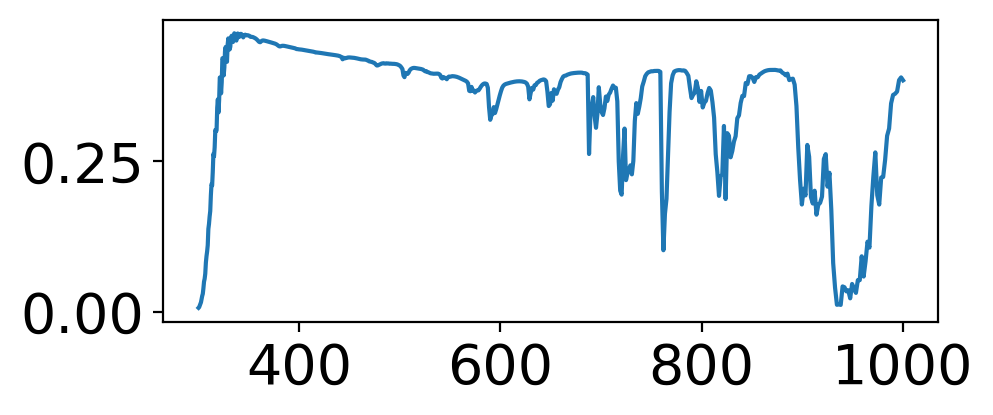

In [73]:
plt.figure()
plt.plot(lam, albedo)
# plt.plot(lam1, albedo1)
# plt.xlim([680, 840])

In [42]:
lam[:-1]/np.diff(lam)

array([500.        , 500.        , 500.        , 500.00000398,
       500.00001587, 499.9999571 , 499.99999687, 500.00005621,
       499.9999749 , 500.0000036 , 499.99998203, 499.99999609,
       500.00004947, 499.99998344, 499.99996499, 499.99999774,
       500.00000452, 499.99998953, 500.0000373 , 499.99999085,
       500.00001505, 499.99995349, 500.00005008, 499.99998918,
       500.0000143 , 499.99997019, 500.00001962, 500.0000079 ,
       499.99993948, 500.00005473, 499.99996374, 499.99998543,
       500.00004471, 499.99998923, 499.9999796 , 500.00001943,
       500.00003474, 499.99995232, 500.00000865, 499.99997533,
       500.00001092, 500.00004207, 499.99999617, 499.99995427,
       499.99999664, 500.00005042, 499.99996747, 499.99998043,
       500.00001681, 500.00000484, 500.00002428, 500.00000361,
       499.99994712, 500.000009  , 500.00004264, 499.9999776 ,
       499.99996766, 500.00001636, 500.00005299, 499.99993349,
       500.00003267, 499.99998392, 500.00001325, 499.99

In [43]:
lam.size

603

In [44]:
dloglam = 1.0 / 500.0
loglam_min = np.log(300)
loglam_max = np.log(1000)
nlam = int(np.ceil((loglam_max - loglam_min)/dloglam))+1
loglam_arr = np.arange(nlam, dtype=np.float64) / (nlam-1) * (loglam_max - loglam_min) + loglam_min
# loglam_arr = np.linspace(loglam_min, loglam_max+(loglam_max - loglam_min)/(nlam-2), int(nlam)-1)
# loglam_arr = (loglam_arr[1:]+loglam_arr[:-1])/2
lam = np.exp(loglam_arr)
lam.size

603

In [45]:
loglam_min.dtype

dtype('float64')

In [46]:
lam[1:] / np.diff(lam)

array([500.5114608, 500.5114608, 500.5114608, 500.5114608, 500.5114608,
       500.5114608, 500.5114608, 500.5114608, 500.5114608, 500.5114608,
       500.5114608, 500.5114608, 500.5114608, 500.5114608, 500.5114608,
       500.5114608, 500.5114608, 500.5114608, 500.5114608, 500.5114608,
       500.5114608, 500.5114608, 500.5114608, 500.5114608, 500.5114608,
       500.5114608, 500.5114608, 500.5114608, 500.5114608, 500.5114608,
       500.5114608, 500.5114608, 500.5114608, 500.5114608, 500.5114608,
       500.5114608, 500.5114608, 500.5114608, 500.5114608, 500.5114608,
       500.5114608, 500.5114608, 500.5114608, 500.5114608, 500.5114608,
       500.5114608, 500.5114608, 500.5114608, 500.5114608, 500.5114608,
       500.5114608, 500.5114608, 500.5114608, 500.5114608, 500.5114608,
       500.5114608, 500.5114608, 500.5114608, 500.5114608, 500.5114608,
       500.5114608, 500.5114608, 500.5114608, 500.5114608, 500.5114608,
       500.5114608, 500.5114608, 500.5114608, 500.5114608, 500.5

In [47]:
lam

array([ 300.        ,  300.60058682,  301.20237599,  301.80536991,
        302.40957101,  303.01498168,  303.62160436,  304.22944148,
        304.83849545,  305.44876873,  306.06026374,  306.67298295,
        307.28692878,  307.90210372,  308.5185102 ,  309.13615071,
        309.7550277 ,  310.37514366,  310.99650106,  311.61910239,
        312.24295014,  312.86804681,  313.4943949 ,  314.1219969 ,
        314.75085534,  315.38097272,  316.01235158,  316.64499442,
        317.27890379,  317.91408222,  318.55053224,  319.18825641,
        319.82725728,  320.4675374 ,  321.10909933,  321.75194564,
        322.3960789 ,  323.04150169,  323.68821658,  324.33622617,
        324.98553305,  325.63613981,  326.28804905,  326.94126339,
        327.59578544,  328.25161781,  328.90876313,  329.56722402,
        330.22700312,  330.88810308,  331.55052652,  332.21427611,
        332.8793545 ,  333.54576434,  334.21350831,  334.88258907,
        335.5530093 ,  336.22477168,  336.89787891,  337.57233

In [48]:
def construct_lam_ifs(lammin, lammax, R, verbose=True):
     
    log_lammin = np.log(float(lammin)).astype(np.float64)
    log_lammax = np.log(float(lammax))
    Nspec = int(np.log(lammax/lammin) * R) + 1
    
    dloglam = (log_lammax - log_lammin) / Nspec
    
    if verbose:
        print('Reduced cube will have %d wavelength bins' % (Nspec))
#     print(np.exp(log_lammin))
#     print(np.exp(log_lammax))
    
#     loglam_midpts = np.arange(log_lammin, log_lammax + dloglam, dloglam)
#     loglam_endpts = calculate_bin_edges(loglam_midpts)
    loglam_midpts = np.linspace(log_lammin, log_lammax, Nspec)
    loglam_endpts = calculate_bin_edges(loglam_midpts)
    
#     loglam_endpts = np.linspace(log_lammin, log_lammax, Nspec)
#     loglam_midpts = (loglam_endpts[1:] + loglam_endpts[:-1]) / 2
    lam_endpts = np.exp(loglam_endpts)
    lam_midpts = np.exp(loglam_midpts)
    
#     print(lam_midpts.size, lam_midpts[:-1] / np.diff(lam_midpts))
#     dlam = (lammax - lammin) / Nspec
#     lam_midpts = np.arange(lammin, lammax + dlam, dlam)
#     lam_endpts = calculate_bin_edges(lam_midpts)
    return lam_midpts, lam_endpts

In [49]:
np.exp(np.log(300)), np.log(300), np.exp(5.703782474656201), np.exp(5.7037825)

(299.99999999999994, 5.703782474656201, 299.99999999999994, 300.00000760313975)

In [50]:
lam.size

603

In [51]:
lam_new, lam_new_bins = construct_lam_ifs(lammin, lammax, R=70)

Reduced cube will have 15 wavelength bins


In [52]:
lam_new[:-1] / np.diff(lam_new)

array([69.26723563, 69.26723563, 69.26723563, 69.26723563, 69.26723563,
       69.26723563, 69.26723563, 69.26723563, 69.26723563, 69.26723563,
       69.26723563, 69.26723563, 69.26723563, 69.26723563])

In [53]:
lam_new

array([684.        , 693.87479858, 703.89215805, 714.05413653,
       724.36282187, 734.82033205, 745.42881564, 756.1904522 ,
       767.10745279, 778.18206037, 789.41655029, 800.81323074,
       812.37444325, 824.10256313, 836.        ])

In [54]:
def construct_lam(lammin, lammax, Res=None, dlam=None):
    # Keyword catching logic
    goR = False
    goL = False
    if ((Res is None) and (dlam is None)) or (Res is not None) and (dlam is not None):
        print("Error in construct_lam: Must specify either Res or dlam, but not both")
    elif Res is not None:
        goR = True
    elif dlam is not None:
        goL = True
    else:
        print("Error in construct_lam: Should not enter this else statment! :)")
        return None, None

    # If Res is provided, generate equal resolving power wavelength grid
    if goR:

        # Set wavelength grid
        dlam0 = lammin/Res
        dlam1 = lammax/Res
        lam  = lammin #in [um]
        Nlam = 1
        while (lam < lammax + dlam1):
            lam  = lam + lam/Res
            Nlam +=1
        lam    = np.zeros(Nlam)
        lam[0] = lammin
        for j in range(1,Nlam):
            lam[j] = lam[j-1] + lam[j-1]/Res
        Nlam = len(lam)
        dlam = np.zeros(Nlam) #grid widths (um)
#         print(lam)
        # Set wavelength widths
        for j in range(1,Nlam-1):
            dlam[j] = 0.5*(lam[j+1]+lam[j]) - 0.5*(lam[j-1]+lam[j])

        #Set edges to be same as neighbor
        dlam[0] = dlam0#dlam[1]
        dlam[Nlam-1] = dlam1#dlam[Nlam-2]

        lam = lam[:-1]
        dlam = dlam[:-1]

    # If dlam is provided, generate evenly spaced grid
    if goL:
        lam = np.arange(lammin, lammax+dlam, dlam)
        dlam = dlam + np.zeros_like(lam)

    return lam, dlam

In [55]:
def construct_lam_chris(lammin, lammax, R, verbose=True):
    dloglam = 1.0 / 500.0
    loglam_min = np.log(300)
    loglam_max = np.log(1000)
    nlam = int(np.ceil((loglam_max - loglam_min)/dloglam))+1
    if verbose:
        print('Reduced cube will have %d wavelength bins' % (nlam))
    loglam_arr = np.arange(nlam, dtype=np.float64) / (nlam-1) * (loglam_max - loglam_min) + loglam_min
    lam = np.exp(loglam_arr)
    return lam

In [56]:
from scipy.stats import binned_statistic
def downbin_spec(specHR, lamHR, lamLR, dlam=None):
    """
    Re-bin spectum to lower resolution using :py:obj:`scipy.binned_statistic`
    with ``statistic = 'mean'``. This is a "top-hat" convolution.
    Parameters
    ----------
    specHR : array-like
        Spectrum to be degraded
    lamHR : array-like
        High-res wavelength grid
    lamLR : array-like
        Low-res wavelength grid
    dlam : array-like, optional
        Low-res wavelength width grid
    Returns
    -------
    specLR : :py:obj:`numpy.ndarray`
        Low-res spectrum
    """

    if dlam is None:
        ValueError("Please supply dlam in downbin_spec()")

    # Reverse ordering if wl vector is decreasing with index
    if len(lamLR) > 1:
        if lamHR[0] > lamHR[1]:
            lamHI = np.array(lamHR[::-1])
            spec = np.array(specHR[::-1])
        if lamLR[0] > lamLR[1]:
            lamLO = np.array(lamLR[::-1])
            dlamLO = np.array(dlam[::-1])

    # Calculate bin edges
    LRedges = np.hstack([lamLR - 0.5*dlam, lamLR[-1]+0.5*dlam[-1]])

    # Call scipy.stats.binned_statistic()
    specLR = binned_statistic(lamHR, specHR, statistic="mean", bins=LRedges)[0]

    return specLR

In [57]:
def downbin_spec_ifs(lam_new, lam_bins, spec):
    # Call scipy.stats.binned_statistic()
    spec_new = binned_statistic(lam_new, spec, statistic="mean", bins=lam_bins)[0]
    return spec_new

In [58]:
lam_new, dlam = construct_lam(lammin, lammax, 1)

In [59]:
lam_new.size

2

In [60]:
lam_new

array([ 684., 1368.])

In [61]:
lam.min(), lam_new.min()

(299.99999999999994, 684.0)

In [62]:
lam.max(), lam_new[:-1].max()

(999.9999999999998, 684.0)

In [63]:
lam_new[:-1] / np.diff(lam_new)

array([1.])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


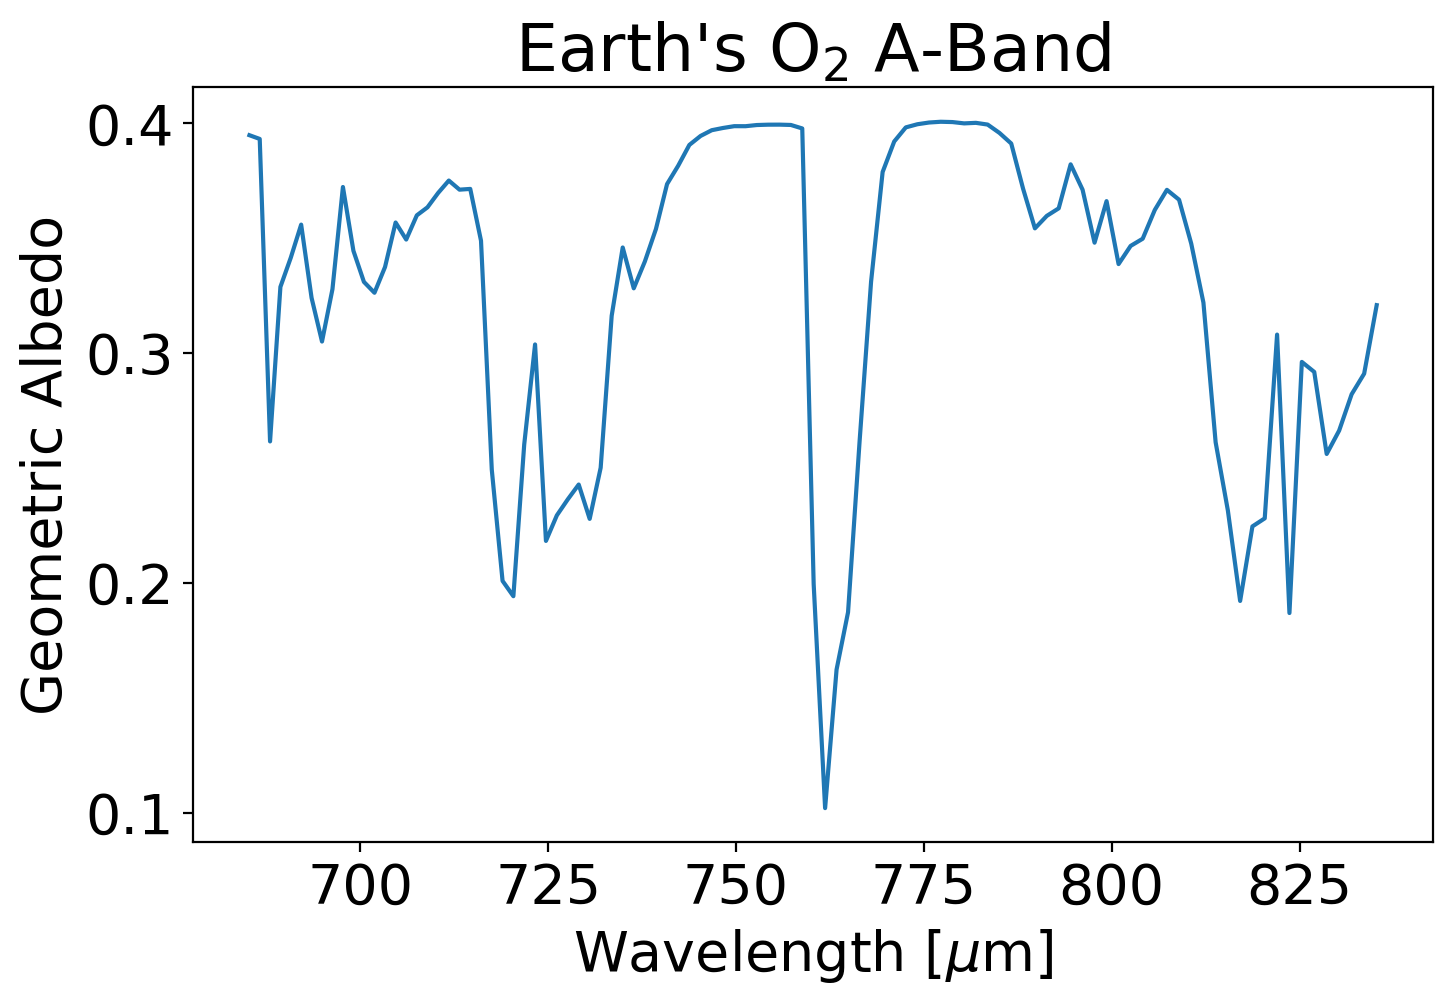

In [64]:
lammin = 684.0
lammax = 836.0

# Create a wavelength mask
m = (lam > lammin) & (lam < lammax)

# Plot the band
plt.plot(lam[m], albedo[m])
plt.xlabel(r"Wavelength [$\mu$m]")
plt.ylabel("Geometric Albedo")
plt.title(r"Earth's O$_2$ A-Band")
plt.show()

In [65]:
lam

array([ 300.        ,  300.60058682,  301.20237599,  301.80536991,
        302.40957101,  303.01498168,  303.62160436,  304.22944148,
        304.83849545,  305.44876873,  306.06026374,  306.67298295,
        307.28692878,  307.90210372,  308.5185102 ,  309.13615071,
        309.7550277 ,  310.37514366,  310.99650106,  311.61910239,
        312.24295014,  312.86804681,  313.4943949 ,  314.1219969 ,
        314.75085534,  315.38097272,  316.01235158,  316.64499442,
        317.27890379,  317.91408222,  318.55053224,  319.18825641,
        319.82725728,  320.4675374 ,  321.10909933,  321.75194564,
        322.3960789 ,  323.04150169,  323.68821658,  324.33622617,
        324.98553305,  325.63613981,  326.28804905,  326.94126339,
        327.59578544,  328.25161781,  328.90876313,  329.56722402,
        330.22700312,  330.88810308,  331.55052652,  332.21427611,
        332.8793545 ,  333.54576434,  334.21350831,  334.88258907,
        335.5530093 ,  336.22477168,  336.89787891,  337.57233

In [66]:
# define set of resolving powers
R = np.array([1, 10, 30, 70, 100, 150, 200, 500])
R = np.arange(70, 190, 20)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


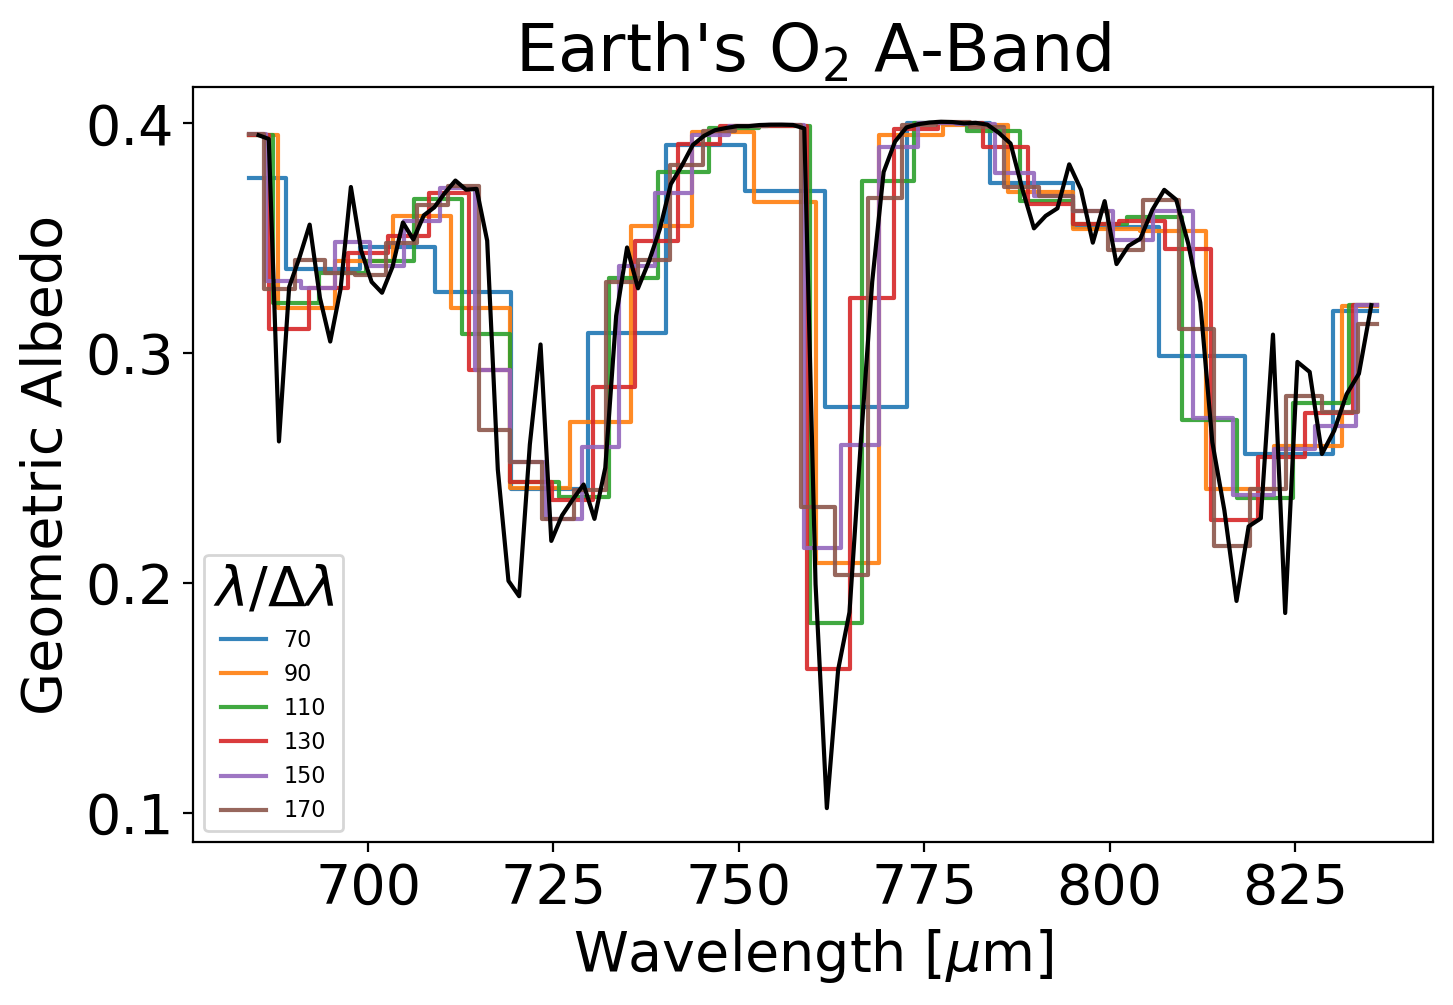

In [67]:
ifs = True
bottom_val = np.zeros(len(R))

# Loop over R
for i, r in enumerate(R):

    
    if ifs:
        wl, dwl = construct_lam_ifs(lammin, lammax, r, verbose=False)
#         print(wl.size, dwl.size)
        Alr = downbin_spec_ifs(lam, dwl, albedo)
    else:                               
        # Construct new low-res wavelength grid
        wl, dwl = construct_lam(lammin, lammax, r)
        #     print(wl)
        # Down-bin flux to low-res
        Alr = downbin_spec(albedo,lam, wl, dlam=dwl)

    # Plot
#     plt.step(wl, Alr, where="mid", alpha = 0.5, color=f"C{i}", label = "%i" %r)
    plt.plot(wl, Alr, drawstyle='steps-mid', alpha = 0.9, color=f"C{i}", label = "%i" %r)
#     plt.scatter(wl, Alr, color=f"C{i}")

    # Save bottom value
    bottom_val[i] = np.min(Alr)

# Finsh plot
plt.plot(lam[m], albedo[m], c = "k")
# plt.xlim(lammin, lammax)
plt.legend(fontsize = 8, title = r"$\lambda / \Delta \lambda$")
plt.xlabel(r"Wavelength [$\mu$m]")
plt.ylabel("Geometric Albedo")
plt.title(r"Earth's O$_2$ A-Band");

In [68]:
0.100231 / np.abs(0.100231 - 0.100232)

100230.99999989977

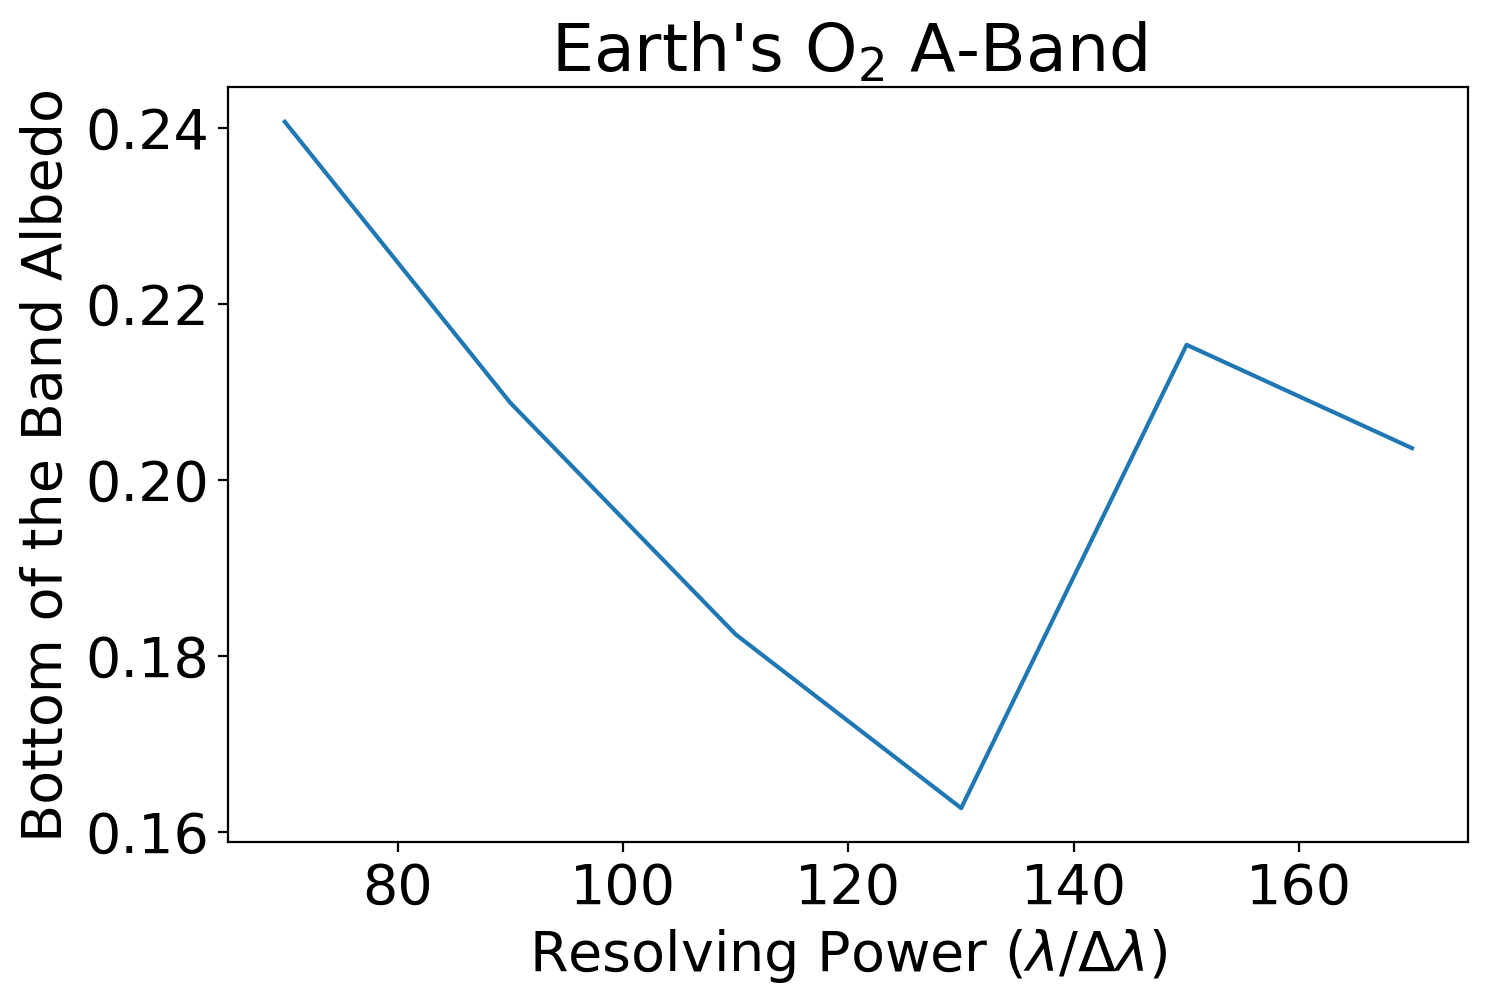

In [69]:

# Create resolution array to loop over
Nres = 100
R = np.linspace(2,1000,Nres)

R = np.arange(70, 190, 20)
Nres = len(R)
# Array to store bottom-of-band albedos
bottom_val = np.zeros(len(R))

# Loop over R
for i, r in enumerate(R):

    # Construct new low-res wavelength grid
    if ifs:
        wl, dwl = construct_lam_ifs(lammin, lammax, r, verbose=False)
#         print(wl.size, dwl.size)
        Alr = downbin_spec_ifs(lam, dwl, albedo)
    else:                               
        # Construct new low-res wavelength grid
        wl, dwl = construct_lam(lammin, lammax, r)
        #     print(wl)
        # Down-bin flux to low-res
        Alr = downbin_spec(albedo,lam, wl, dlam=dwl)

    # Save bottom value
    bottom_val[i] = np.min(Alr)


# Make plot
plt.plot(R, bottom_val);
plt.xlabel(r"Resolving Power ($\lambda / \Delta \lambda$)")
plt.ylabel("Bottom of the Band Albedo")
plt.title(r"Earth's O$_2$ A-Band")
plt.show()

In [70]:
print(bottom_val)

[0.24070088 0.20877604 0.18244026 0.16270498 0.21535428 0.20360888]


<ipython-input-71-4007f368489b>:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Alrs = np.array(Alrs).reshape((Ntest, Nres), order = 'F')
<ipython-input-71-4007f368489b>:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lams = np.array(lams).reshape((Ntest, Nres), order = 'F')


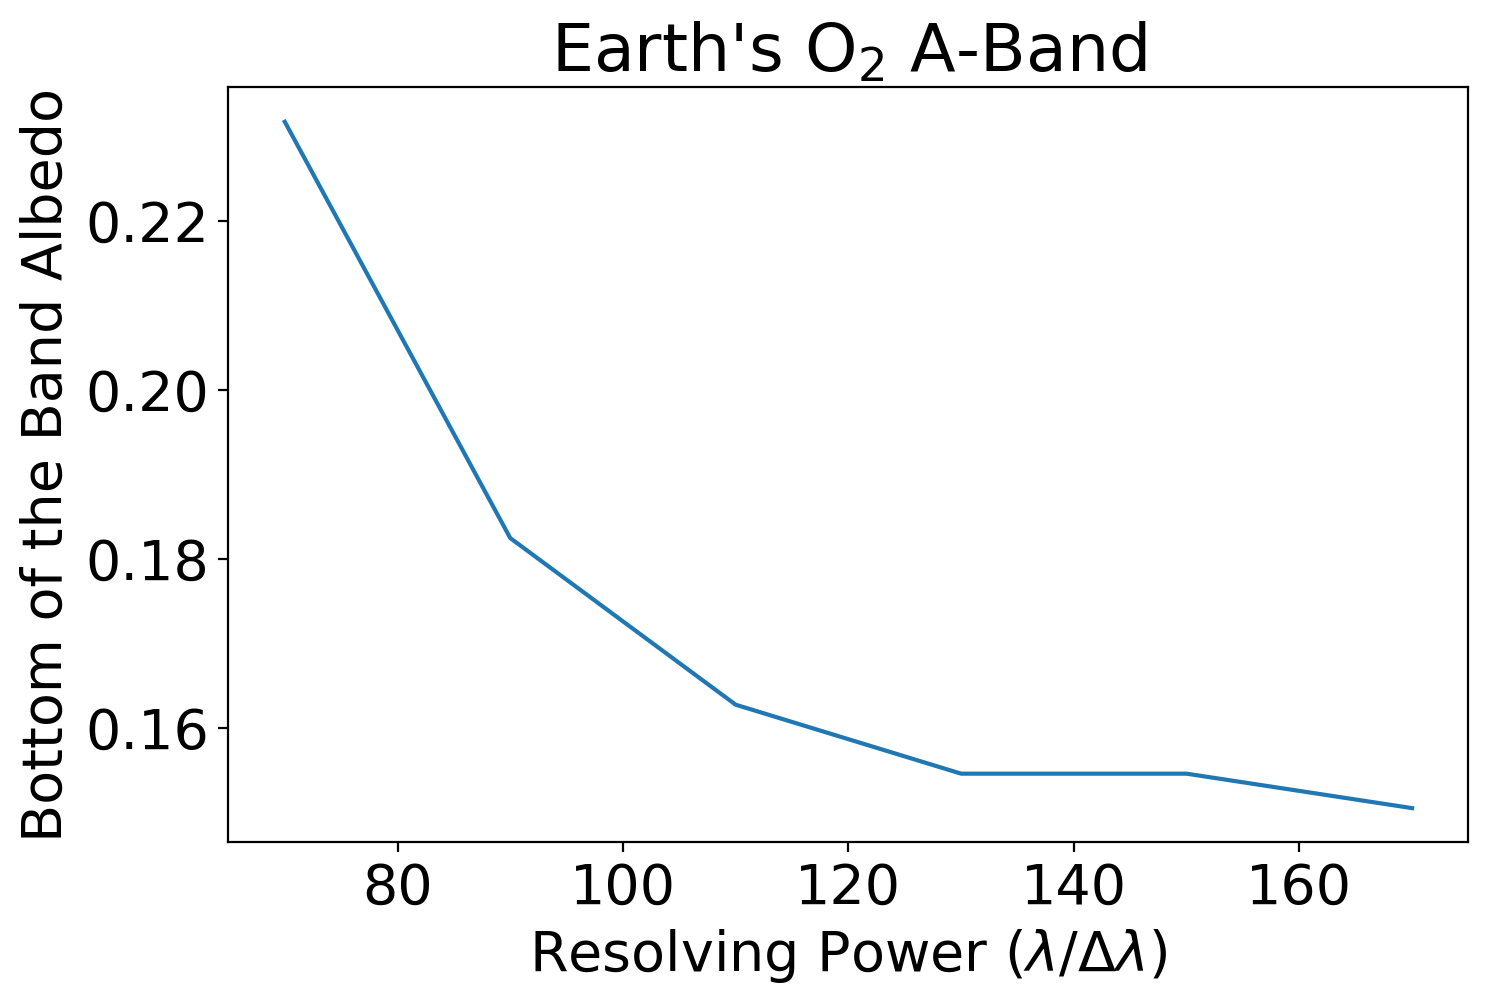

In [71]:
# Create resolution array to loop over
Nres = 200
R = np.linspace(2,1000, Nres)

R = np.arange(70, 190, 20)
Nres = len(R)
# Set number of initial positions
Ntest = 1000

# Arrays to save quantities
bottom_vals = np.nan*np.zeros([len(R), Ntest])
best = np.nan*np.zeros(len(R), dtype=int)
Alrs = []
lams = []

# Loop over R
for i, r in enumerate(R):

    # Set grid of minimum wavelengths to iterate over
    lammin_vals = np.linspace(lammin - 3*lammin/r, lammin, Ntest)

    # Loop over minimum wavelengths to adjust bin centers
    for j, lmin in enumerate(lammin_vals):

        if ifs:
            wl, dwl = construct_lam_ifs(lmin, lammax, r, verbose=False)
#             print(wl.size, dwl.size)
            Alr = downbin_spec_ifs(lam, dwl, albedo)
        else:                               
            # Construct new low-res wavelength grid
            wl, dwl = construct_lam(lmin, lammax, r)
            #     print(wl)
            # Down-bin flux to low-res
            Alr = downbin_spec(albedo,lam, wl, dlam=dwl)

        # Keep track of the minimum
        is_best = ~np.isfinite(best[i]) or (np.nansum(np.min(Alr) < bottom_vals[i,:]) > 0)
 
        if is_best:
            best[i] = j

        # Save quantities
        bottom_vals[i,j] = np.min(Alr)
        Alrs.append(Alr)
        lams.append(wl)
#     print(wl)
# Reshape saved arrays
Alrs = np.array(Alrs).reshape((Ntest, Nres), order = 'F')
lams = np.array(lams).reshape((Ntest, Nres), order = 'F')
best =  np.array(best, dtype=int)

# Plot the global minimum
plt.plot(R, np.min(bottom_vals, axis = 1));
plt.xlabel(r"Resolving Power ($\lambda / \Delta \lambda$)")
plt.ylabel("Bottom of the Band Albedo")
# plt.xlim([100, 500])
plt.title(r"Earth's O$_2$ A-Band");

[0 0 1 1 2 3 4 5 7 9]
683.9999999999998 836.0000000000001
683.7033033033035 836.0000000000001
683.9999999999998 836.0000000000001
683.9999999999998 836.0000000000001
683.9999999999998 836.0000000000001
683.9999999999998 836.0000000000001
6


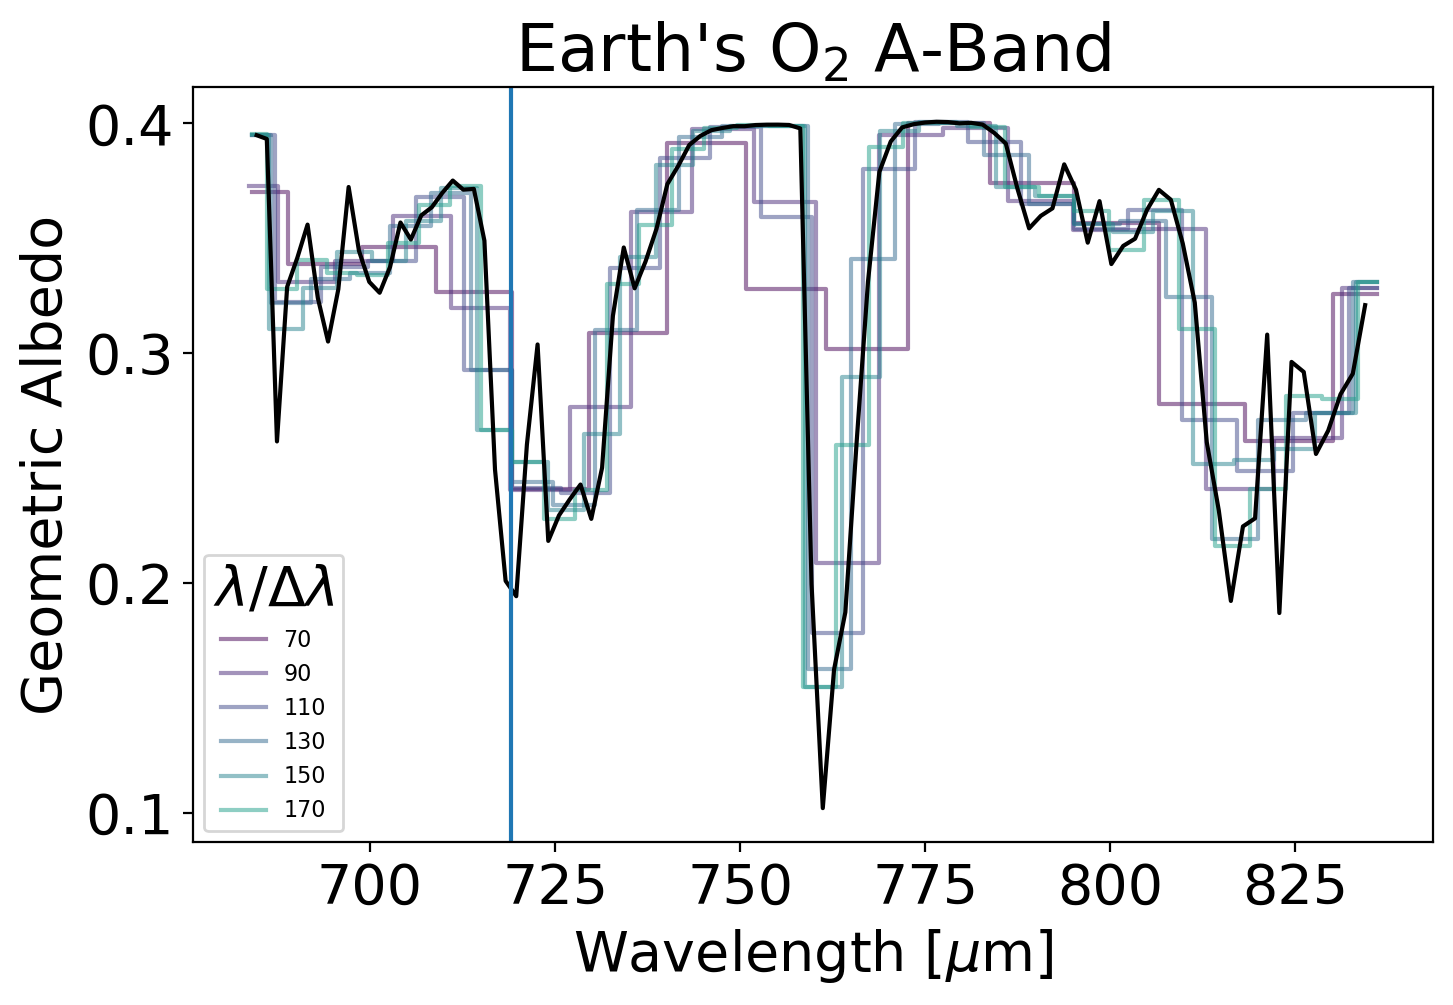

In [245]:

# Get some log-spaced indices so we're not plotting all R
iz = np.array(np.logspace(np.log10(1), np.log10(10), 10).round(), dtype=int) - 1
print(iz)
colors = plt.cm.viridis(np.linspace(0,1, 10))
# Loop over R
count = 0
for i, r in enumerate(R):

    
    # Plot some of the resolutions
    if i in iz:
        
        wlens = lams[best[i], i]
        alb = Alrs[best[i], i]
        
        plt.plot(wlens, alb,  drawstyle='steps-mid', alpha = 0.5, color=colors[count], label=f'{int(r)}')
        print(wlens.min(), wlens.max())
        count +=1
#         plt.scatter(wl, Alr, color=f"C{i}")
#         plt.plot(lams[best[i], i], Alrs[best[i], i], ls = "steps-mid", alpha = 0.5, label = "%i" %r)
print(count)

# Finsh plot
plt.plot(lam[m], albedo[m], c = "k")
plt.legend(fontsize = 8, title = r"$\lambda / \Delta \lambda$")
plt.xlabel(r"Wavelength [$\mu$m]")
plt.ylabel("Geometric Albedo")
# plt.xlim(0.9*lammin, 1.1*lammax)
plt.axvline(719)
plt.title(r"Earth's O$_2$ A-Band");


In [158]:
lam[m][albedo[m].argmin()]

761.1661883

In [278]:
lams.shape

(100, 6)

In [285]:
lams[0][5].shape, R[3]

((37,), 130)

In [313]:
wlens[:-1] / np.diff(wlens)

array([148.99921706, 148.99921706, 148.99921706, 148.99921706,
       148.99921706, 148.99921706, 148.99921706, 148.99921706,
       148.99921706, 148.99921706, 148.99921706, 148.99921706,
       148.99921706, 148.99921706, 148.99921706, 148.99921706,
       148.99921706, 148.99921706, 148.99921706, 148.99921706,
       148.99921706, 148.99921706, 148.99921706, 148.99921706,
       148.99921706, 148.99921706, 148.99921706, 148.99921706,
       148.99921706, 148.99921706])

In [1]:
R = np.arange(50, 190, 20)
Nres = len(R)
Ntest = 50

lams_best = []
albedos_best = []

for i, r in enumerate(R):
    lammins = np.linspace(lammin - 760 / r, lammin, Ntest)
    
    wlens_opt = None
    albedo_min = None
    
    for j, lmin in enumerate(lammins):
        # Construct new low-res wavelength grid
        wl, dwl = construct_lam(lmin, lammax, r)
        #     print(wl)
        # Down-bin flux to low-res
        Alr = downbin_spec(albedo,lam, wl, dlam=dwl)
        if wlens_opt is None and albedo_min is None:
            wlens_opt = lmin
            albedo_min = Alr.min()
        else:
            if np.min(Alr) < albedo_min:
                albedo_min = np.min(Alr)
                wlen_opt = lmin
    
    lam_best, dwl = construct_lam_ifs(wlens_opt, lammax, r, verbose=False)
    albedo_best = downbin_spec_ifs(lam, dwl, albedo)
    
    lams_best.append(lam_best)
    albedos_best.append(albedo_best)
    

NameError: name 'np' is not defined

In [126]:
lams_best

[array([668.8       , 682.50567303, 696.4922155 , 710.76538322,
        725.33105001, 740.19521002, 755.36398025, 770.84360306,
        786.64044873, 802.76101808, 819.21194518, 836.        ]),
 array([673.14285714, 682.93679298, 692.87322632, 702.95423044,
        713.1819088 , 723.55839542, 734.08585541, 744.76648537,
        755.60251385, 766.59620182, 777.74984318, 789.06576517,
        800.54632891, 812.19392985, 824.01099832, 836.        ]),
 array([675.55555556, 683.17485019, 690.88007951, 698.67221273,
        706.55222999, 714.52112252, 722.57989268, 730.72955418,
        738.97113213, 747.30566323, 755.73419584, 764.25779017,
        772.87751838, 781.59446473, 790.40972568, 799.3244101 ,
        808.33963933, 817.45654737, 826.67628102, 836.        ]),
 array([677.09090909, 683.32580509, 689.61811424, 695.96836524,
        702.37709163, 708.84483186, 715.37212937, 721.95953258,
        728.60759496, 735.31687508, 742.08793666, 748.92134861,
        755.81768506, 762.77752546

In [127]:
albedos_best

[array([0.39436249, 0.37557402, 0.33660434, 0.3515512 , 0.23637126,
        0.36543013, 0.32565135, 0.35502572, 0.38177279, 0.35684873,
        0.25423772, 0.32370284]),
 array([0.39583947, 0.37627176, 0.33650879, 0.34365546, 0.33126007,
        0.24070088, 0.30889872, 0.39059793, 0.37050609, 0.27663865,
        0.40015238, 0.37399772, 0.35470587, 0.28961729, 0.26191163,
        0.32590851]),
 array([0.39631819, 0.39515366, 0.31949637, 0.34039295, 0.35616132,
        0.31948039, 0.24115519, 0.26988484, 0.35545713, 0.3962987 ,
        0.36579376, 0.20877604, 0.39499464, 0.39790588, 0.36617533,
        0.35343625, 0.35397719, 0.24091965, 0.26322269, 0.32833327]),
 array([0.39648268, 0.39515366, 0.32196533, 0.33476168, 0.34021213,
        0.3670751 , 0.3083525 , 0.24410232, 0.23728919, 0.33686838,
        0.38508478, 0.39838392, 0.39900702, 0.18244026, 0.37508732,
        0.40026631, 0.39168788, 0.36481995, 0.35416284, 0.3624965 ,
        0.27090165, 0.24874961, 0.27407525, 0.32833327]),


In [128]:
lam

array([300.       , 300.6      , 301.2012   , 301.8036024, 302.4072096,
       303.012024 , 303.6180481, 304.2252842, 304.8337347, 305.4434022,
       306.054289 , 306.6663976, 307.2797304, 307.8942898, 308.5100784,
       309.1270986, 309.7453528, 310.3648435, 310.9855732, 311.6075443,
       312.2307594, 312.8552209, 313.4809314, 314.1078932, 314.736109 ,
       315.3655812, 315.9963124, 316.628305 , 317.2615616, 317.8960848,
       318.5318769, 319.1689407, 319.8072786, 320.4468931, 321.0877869,
       321.7299625, 322.3734224, 323.0181692, 323.6642056, 324.311534 ,
       324.9601571, 325.6100774, 326.2612975, 326.9138201, 327.5676478,
       328.2227831, 328.8792286, 329.5369871, 330.1960611, 330.8564532,
       331.5181661, 332.1812024, 332.8455648, 333.511256 , 334.1782785,
       334.846635 , 335.5163283, 336.187361 , 336.8597357, 337.5334551,
       338.2085221, 338.8849391, 339.562709 , 340.2418344, 340.9223181,
       341.6041627, 342.287371 , 342.9719458, 343.6578897, 344.3

12 49.79731176482566
16 69.73057660602093
20 89.66379209703739
24 109.5969853189051
28 129.53016660215835
32 149.46334074336582
36 169.39651027303336


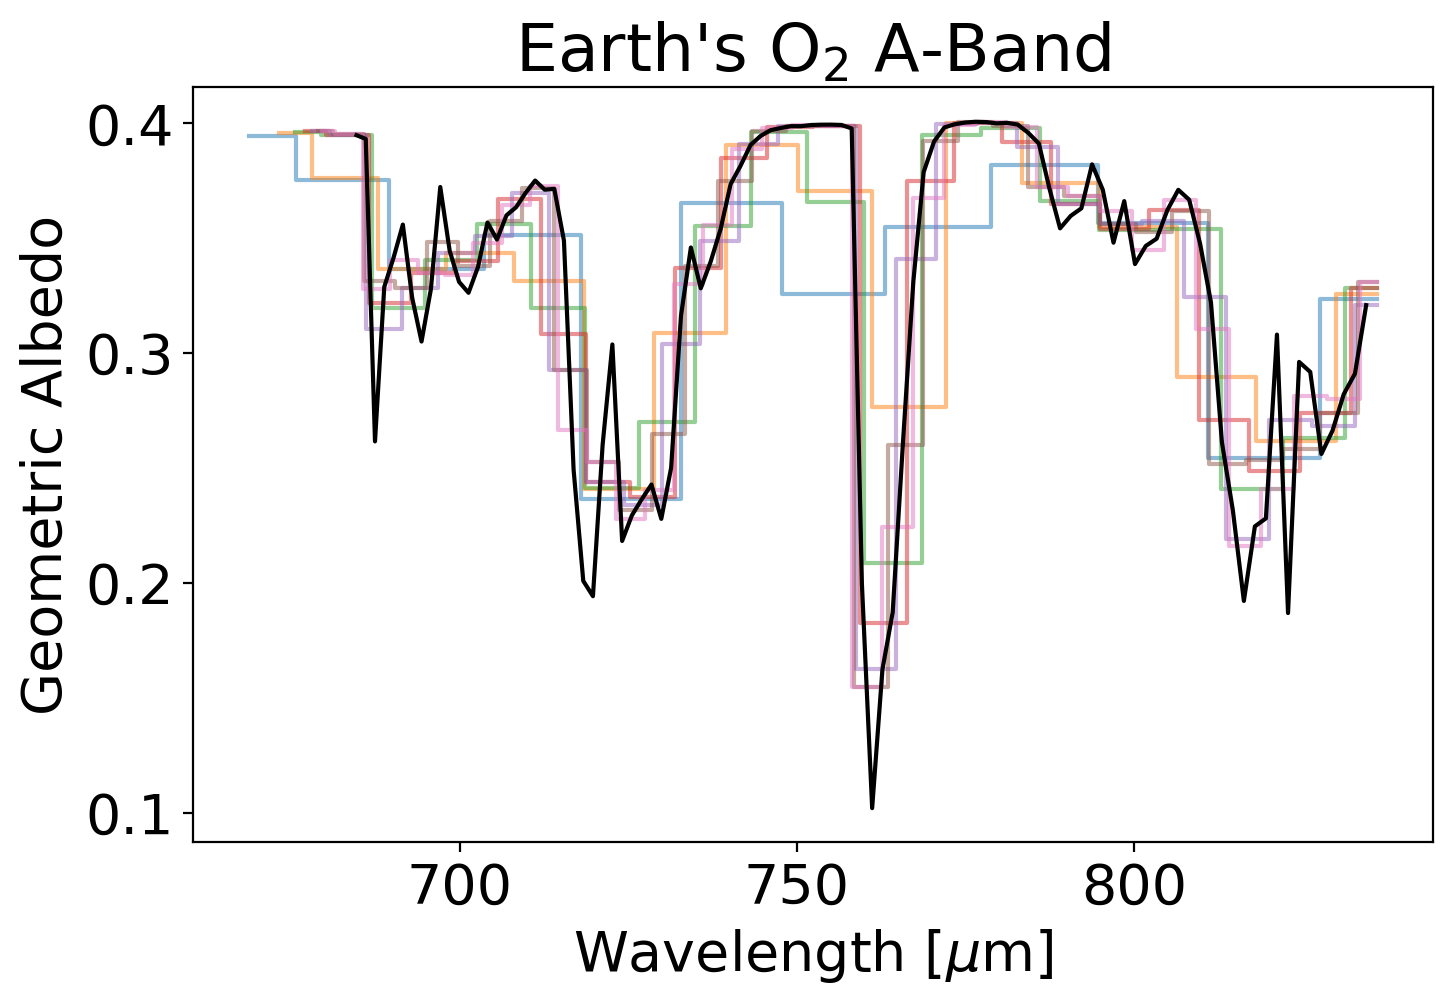

In [129]:
for r, wlen, a in zip(R, lams_best, albedos_best):
    plt.plot(wlen, a,  drawstyle='steps-mid', alpha = 0.5, label=f'{int(r)}')
#     plt.plot(wlen, a, alpha = 0.5, label=f'{int(r)}')
    print(len(wlen), (wlen[1:]/np.diff(wlen))[0])
        
plt.plot(lam[m], albedo[m], 'k')
plt.xlabel(r"Wavelength [$\mu$m]")
plt.ylabel("Geometric Albedo")
plt.title(r"Earth's O$_2$ A-Band")
plt.show()

In [ ]:
def construct_lam_chris(lammin, lammax, R, verbose=True):
    dloglam = 1.0 / R
    loglam_min = np.log(300)
    loglam_max = np.log(1000)
    nlam = int(np.ceil((loglam_max - loglam_min)/dloglam))+1
    if verbose:
        print('Reduced cube will have %d wavelength bins' % (nlam))
    loglam_arr = np.arange(nlam, dtype=np.float64) / (nlam-1) * (loglam_max - loglam_min) + loglam_min
    lam = np.exp(loglam_arr)
    return lam

In [220]:
def construct_lam_chris(lammin, lammax, lamref, R, verbose=True):
    dloglam = 1.0 / R
    loglam_min = np.log(lammin)
    loglam_max = np.log(lammax)
    loglam_ref = np.log(lamref)
    nlam = int(np.ceil((loglam_max - loglam_min)/dloglam))
    if verbose:
        print('Reduced cube will have %d wavelength bins' % (nlam))
    loglam_arr = (np.arange(nlam) - (nlam) /2) / (nlam-1) * (loglam_max - loglam_min) + loglam_ref -dloglam
    lam = np.exp(loglam_arr)
    return lam

In [226]:
lam_test = construct_lam_chris(684, 836, 760, 300//2)

Reduced cube will have 31 wavelength bins


In [227]:
lam_test[1:] / np.diff(lam_test) 

array([149.99921706, 149.99921706, 149.99921706, 149.99921706,
       149.99921706, 149.99921706, 149.99921706, 149.99921706,
       149.99921706, 149.99921706, 149.99921706, 149.99921706,
       149.99921706, 149.99921706, 149.99921706, 149.99921706,
       149.99921706, 149.99921706, 149.99921706, 149.99921706,
       149.99921706, 149.99921706, 149.99921706, 149.99921706,
       149.99921706, 149.99921706, 149.99921706, 149.99921706,
       149.99921706, 149.99921706])

In [228]:
lam_test

array([680.59805704, 685.16585324, 689.76430595, 694.39362092,
       699.05400528, 703.74566755, 708.46881766, 713.22366692,
       718.01042809, 722.82931535, 727.6805443 , 732.564332  ,
       737.48089698, 742.43045921, 747.41324015, 752.42946275,
       757.47935145, 762.5631322 , 767.68103247, 772.83328123,
       778.02010903, 783.24174794, 788.49843159, 793.79039518,
       799.11787549, 804.48111089, 809.88034135, 815.31580844,
       820.78775537, 826.29642697, 831.84206972])

In [229]:
lam_mid_test = np.exp(calculate_bin_edges(np.log(lam_test)))

In [231]:
lam_mid_test

array([678.32559121, 682.87813588, 687.4612347 , 692.07509274,
       696.71991642, 701.39591359, 706.10329345, 710.84226663,
       715.61304517, 720.41584252, 725.25087358, 730.11835468,
       735.01850362, 739.95153963, 744.91768344, 749.91715725,
       754.95018475, 760.01699114, 765.11780312, 770.25284892,
       775.42235829, 780.62656254, 785.86569451, 791.13998863,
       796.44968089, 801.79500885, 807.17621168, 812.59353016,
       818.04720667, 823.53748523, 829.06461148, 834.62883275])

In [230]:
lam_mid_test[:-1] / np.diff(lam_mid_test)

array([148.99921706, 148.99921706, 148.99921706, 148.99921706,
       148.99921706, 148.99921706, 148.99921706, 148.99921706,
       148.99921706, 148.99921706, 148.99921706, 148.99921706,
       148.99921706, 148.99921706, 148.99921706, 148.99921706,
       148.99921706, 148.99921706, 148.99921706, 148.99921706,
       148.99921706, 148.99921706, 148.99921706, 148.99921706,
       148.99921706, 148.99921706, 148.99921706, 148.99921706,
       148.99921706, 148.99921706, 148.99921706])